# Loading the data is the project's starting point. We import the dataset using suitable methods, setting the stage for exploration, preprocessing, and model development.

In [ ]:
# import necessary libraries for ETL process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



# Load CSV into a Pandas dataframe

df = pd.read_csv("https://raw.githubusercontent.com/MicrosoftLearning/mslearn-azure-ml/main/Labs/06/diabetes-data/diabetes.csv")
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
# The "Patient ID" is a unique identifier for each patient and does not have a impact on the prediction of diabetes.
# Including it as a feature could introduce noise and unnecessary complexity to the model.

df.drop(columns=['PatientID'], inplace=True)

In [ ]:
# Rename the columns with spaces
new_column_names = {
    'PlasmaGlucose': 'Plasma Glucose',
    'DiastolicBloodPressure': 'Diastolic Blood Pressure',
    'TricepsThickness': 'Triceps Thickness',
    'SerumInsulin': 'Serum Insulin',
    'DiabetesPedigree': 'Diabetes Pedigree',
}

df.rename(columns=new_column_names, inplace=True)

In [ ]:
print(df.info())  # Display information about the dataset's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               10000 non-null  int64  
 1   Plasma Glucose            10000 non-null  int64  
 2   Diastolic Blood Pressure  10000 non-null  int64  
 3   Triceps Thickness         10000 non-null  int64  
 4   Serum Insulin             10000 non-null  int64  
 5   BMI                       10000 non-null  float64
 6   Diabetes Pedigree         10000 non-null  float64
 7   Age                       10000 non-null  int64  
 8   Diabetic                  10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB
None


In [ ]:
# Count of Null Values per Column
null_counts = df.isnull().sum()  # Count the null values in each column
print(null_counts)

Pregnancies                 0
Plasma Glucose              0
Diastolic Blood Pressure    0
Triceps Thickness           0
Serum Insulin               0
BMI                         0
Diabetes Pedigree           0
Age                         0
Diabetic                    0
dtype: int64


#Visualization is a crucial step in our machine learning development. It involves creating clear and insightful graphs and charts to highlight important patterns and trends in the data. These visualizations help us make informed decisions and guide the next steps in our analysis.

In [ ]:
# set features and labels dataset
df_features = ['Pregnancies', 'Plasma Glucose', 'Diastolic Blood Pressure',
                     'Triceps Thickness', 'Serum Insulin', 'BMI', 'Diabetes Pedigree', 'Age']

df_label = ['Diabetic']


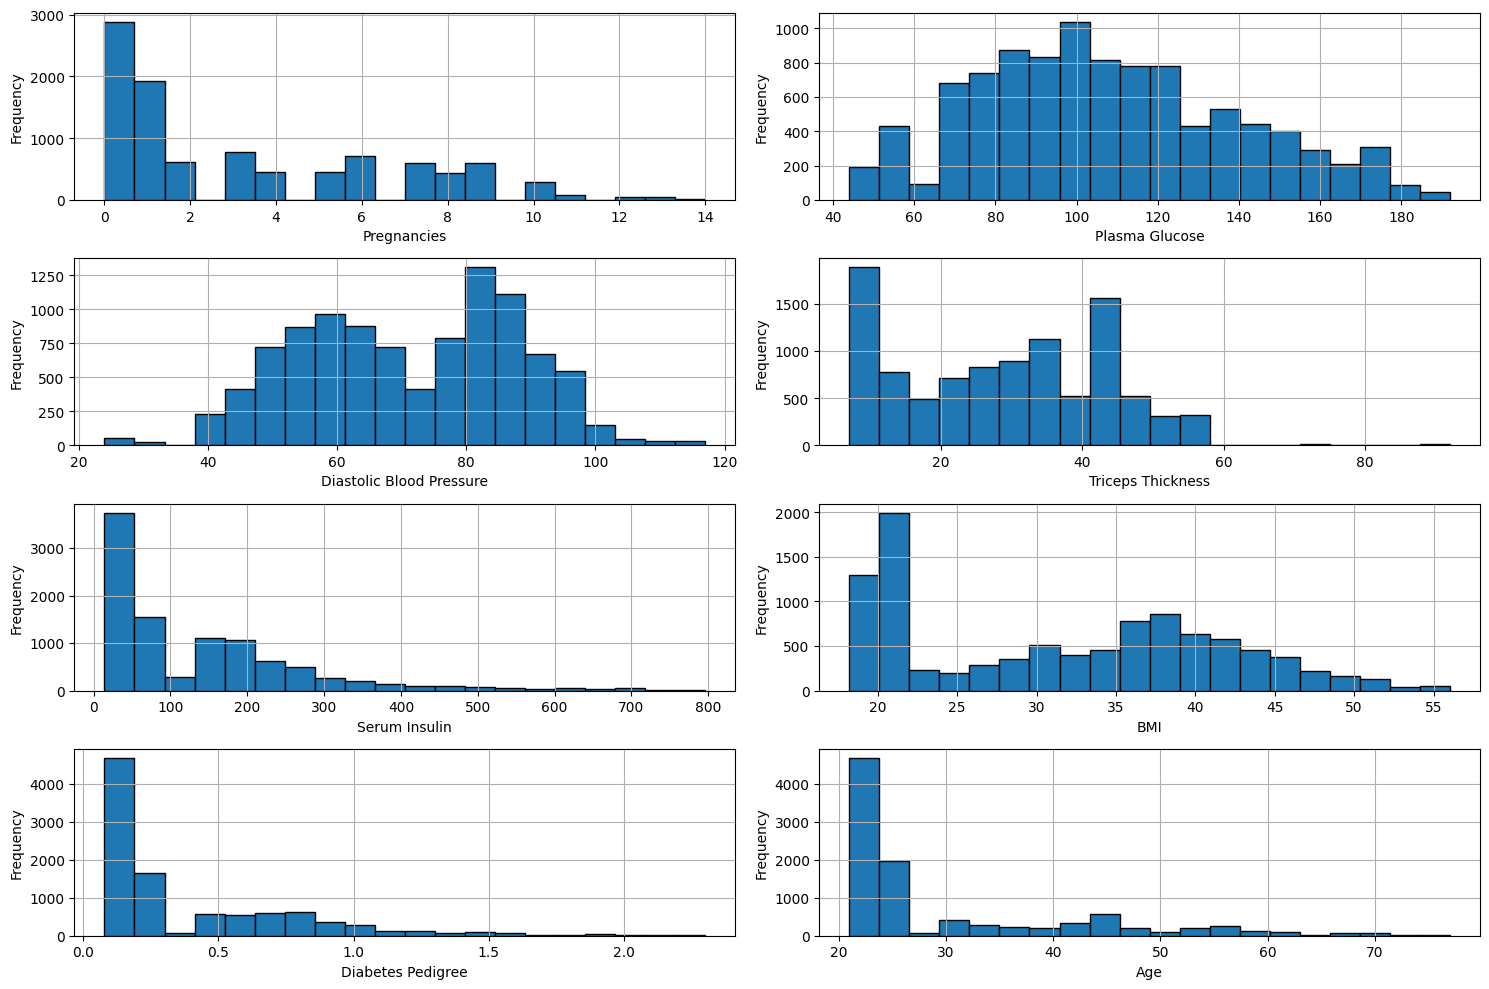

In [ ]:
def visualize_distribution(data, columns):
    num_rows = (len(columns) + 1) // 2
    num_cols = 2
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, num_cols, i)
        data[column].hist(bins=20, edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

visualize_distribution(df, df_features)


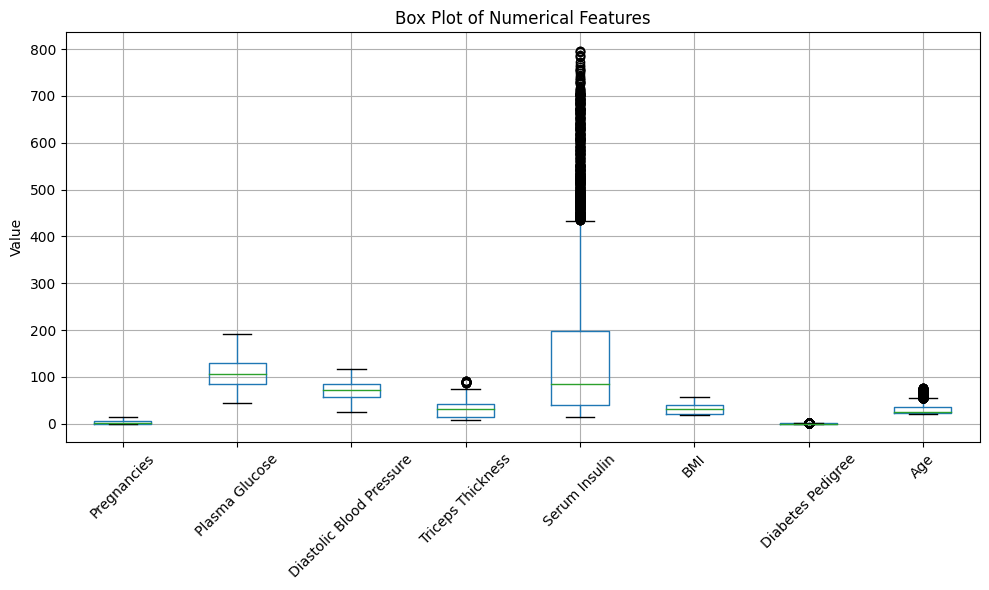

In [ ]:
def visualize_boxplot(data, columns):
    plt.figure(figsize=(10, 6))
    data[columns].boxplot()
    plt.title('Box Plot of Numerical Features')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


visualize_boxplot(df, df_features)


# Observe a prominent outlier in the Serum Insulin column. This suggests that this feature significantly influences the label determination process.

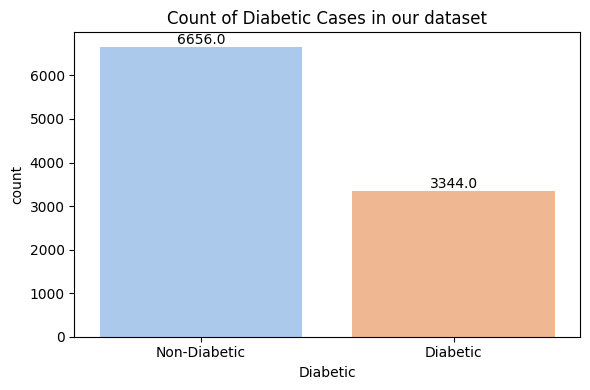

In [ ]:
# Count the number of cases for each Diabetic status
diabetic_counts = df['Diabetic'].value_counts()

# Create the count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Diabetic', palette='pastel')

# Add the total number inside the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Count of Diabetic Cases in our dataset')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

# After a comprehensive exploration of the dataset, the subsequent step involves the Split Data into Train and Test Sets of the data. This strategic phase aims to train our model's predictive capabilities and validate it's performance. No need to scale our numerical features as this is a binary classification problem and the algorithms used are not sensitive to feature scaling (e.g., Logistic regression, Decision trees, Random forests)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and labels (y)
X = df.drop("Diabetic", axis=1)
y = df["Diabetic"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

# Models Initialization
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()
naive_bayes_model = GaussianNB()

models = [
    logistic_regression_model, random_forest_model, gradient_boosting_model,
    svm_model, knn_model, decision_tree_model, naive_bayes_model
]

model_scores = []

# Train and Evaluate Models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_scores.append((model.__class__.__name__, accuracy, precision, recall, f1))

# Sort models based on F1-score
sorted_models = sorted(model_scores, key=lambda x: x[4], reverse=True)

# Print results in sorted order
for model_name, accuracy, precision, recall, f1 in sorted_models:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")
    print("---------------------------------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: GradientBoostingClassifier
Accuracy: 0.95, Precision: 0.92, Recall: 0.91, F1-score: 0.91
---------------------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.93, Precision: 0.90, Recall: 0.87, F1-score: 0.89
---------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.89, Precision: 0.82, Recall: 0.83, F1-score: 0.82
---------------------------------------------------------------
Model: KNeighborsClassifier
Accuracy: 0.85, Precision: 0.78, Recall: 0.72, F1-score: 0.75
---------------------------------------------------------------
Model: SVC
Accuracy: 0.82, Precision: 0.78, Recall: 0.60, F1-score: 0.68
---------------------------------------------------------------
Model: GaussianNB
Accuracy: 0.79, Precision: 0.71, Recall: 0.59, F1-score: 0.65
---------------------------------------------------------------
Model: LogisticRegression
Accuracy: 0.80, Precision: 0.73, Recall: 0.57, F1-score: 0.64
-----

Model: GradientBoostingClassifier
True Positive: 576, True Negative: 1315, False Positive: 51, False Negative: 58
---------------------------------------------------------------
Model: RandomForestClassifier
True Positive: 554, True Negative: 1307, False Positive: 59, False Negative: 80
---------------------------------------------------------------
Model: DecisionTreeClassifier
True Positive: 524, True Negative: 1253, False Positive: 113, False Negative: 110
---------------------------------------------------------------
Model: KNeighborsClassifier
True Positive: 456, True Negative: 1237, False Positive: 129, False Negative: 178
---------------------------------------------------------------
Model: SVC
True Positive: 379, True Negative: 1257, False Positive: 109, False Negative: 255
---------------------------------------------------------------
Model: GaussianNB
True Positive: 376, True Negative: 1212, False Positive: 154, False Negative: 258
-----------------------------------------

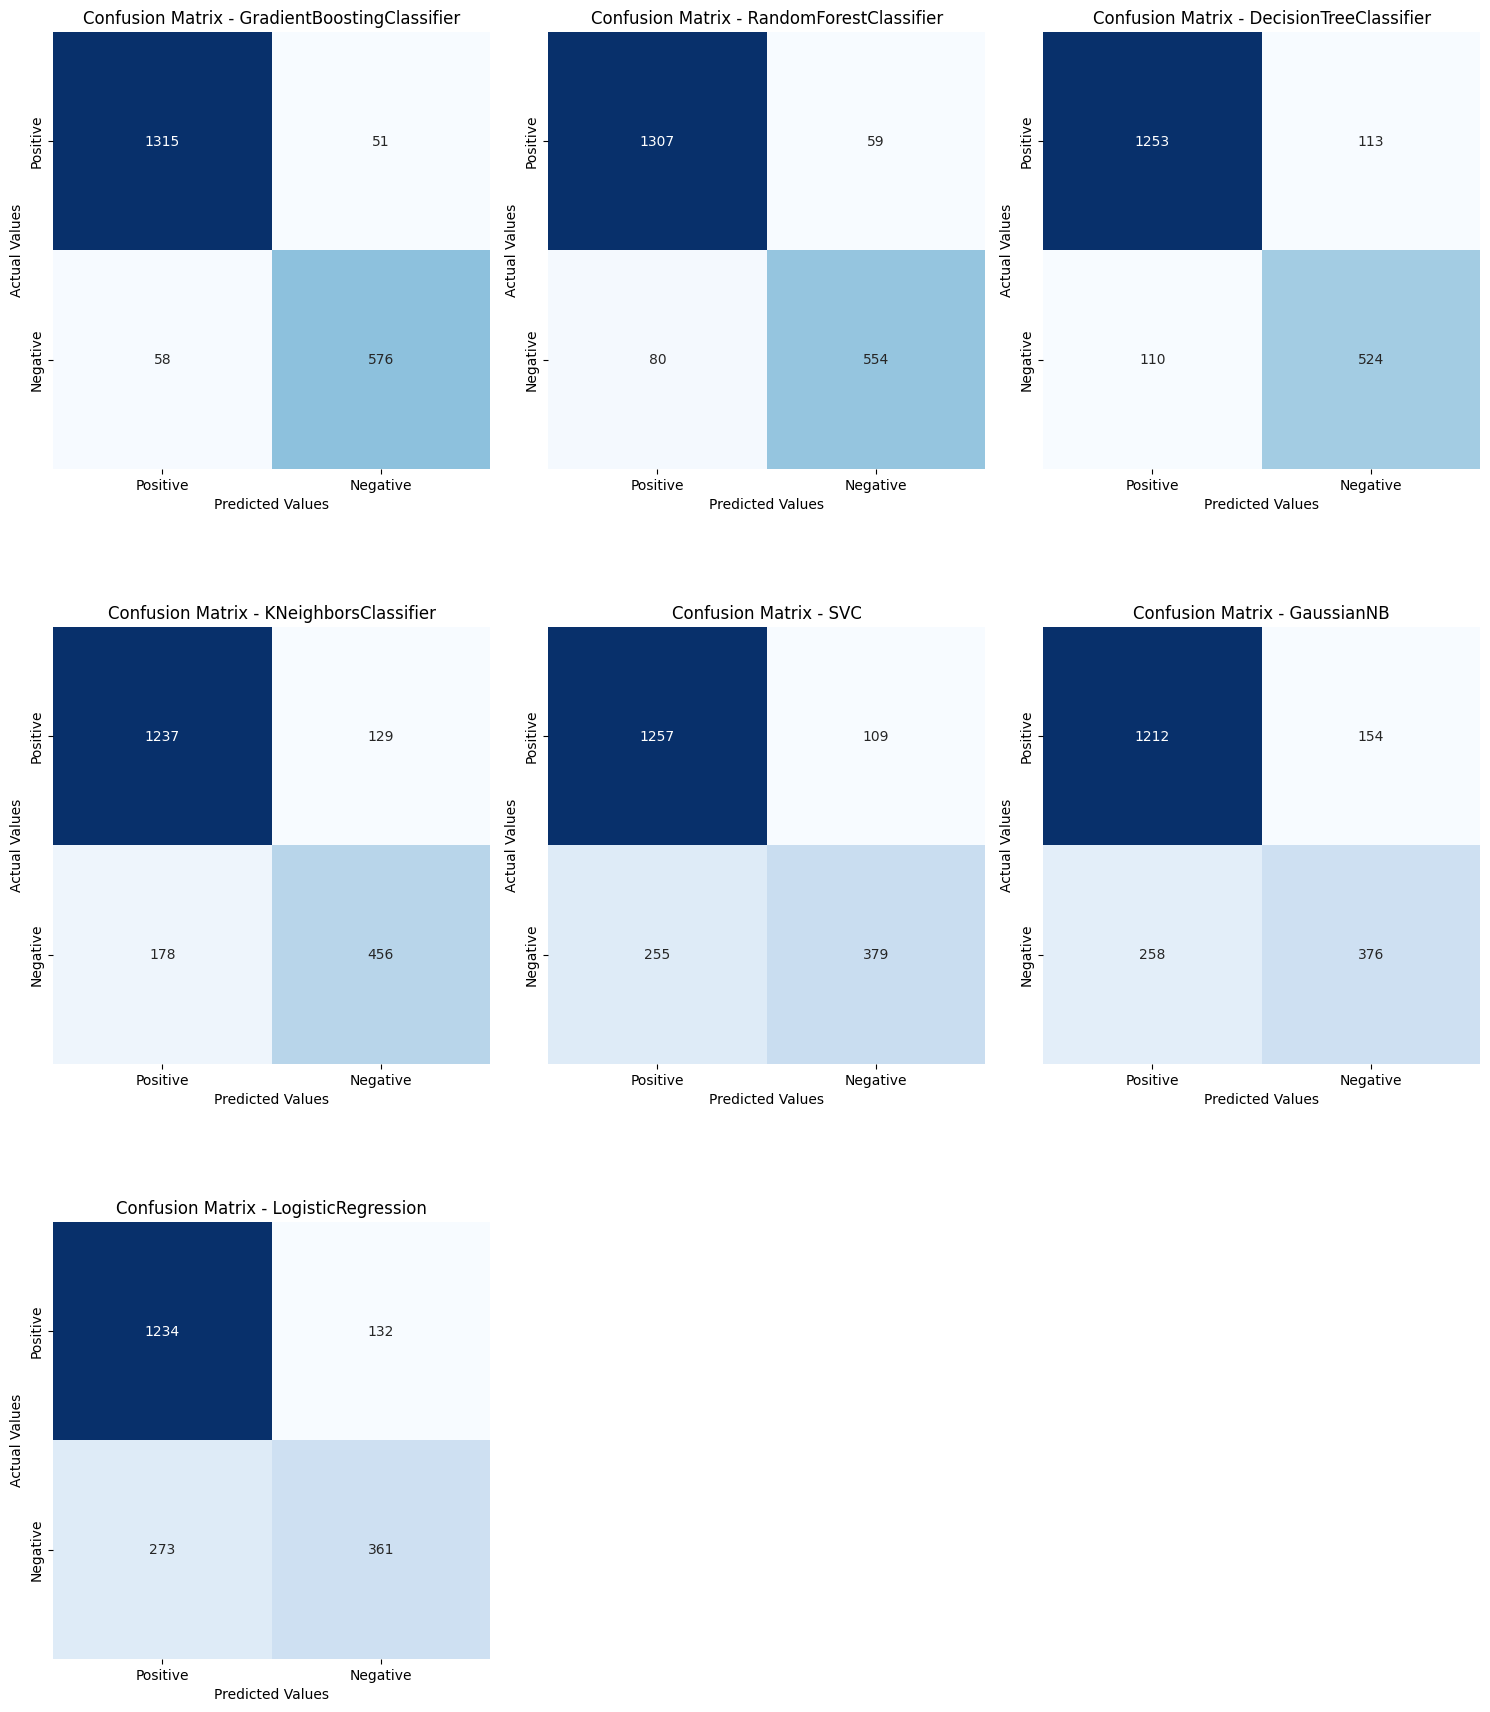

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(ax, model, model_name, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.set_title(f'Confusion Matrix - {model_name}')

    # Extract TP, TN, FP, FN values
    tp = confusion_mat[1, 1]
    tn = confusion_mat[0, 0]
    fp = confusion_mat[0, 1]
    fn = confusion_mat[1, 0]

    print(f"Model: {model_name}")
    print(f"True Positive: {tp}, True Negative: {tn}, False Positive: {fp}, False Negative: {fn}")
    print("---------------------------------------------------------------")

def plot_models_confusion_matrices(models, X_test, y_test):
    # Define class labels
    classes = ['Positive', 'Negative']

    # Calculate the number of rows and columns for subplots
    num_models = len(models)
    num_cols = 3
    num_rows = math.ceil(num_models / num_cols)

    # Create a figure with subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

    # Visualize confusion matrix for each model (sorted)
    for i, (model_name, _, _, _, _) in enumerate(sorted_models):
        model = next(model for model in models if model.__class__.__name__ == model_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        plot_confusion_matrix(axs[row_idx, col_idx], model, model_name, X_test, y_test, classes)

    # Remove any empty subplots
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage
plot_models_confusion_matrices(models, X_test, y_test)  # Replace models, X_test, and y_test with your actual data


# Since Gradient Boosting Classifier is our top performing model how can we improve it?


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 75],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3],
    'min_samples_split': [2, 4]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the GridSearchCV instance to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on a validation set (not the test set)
validation_f1 = f1_score(y_test, best_estimator.predict(X_test))

print("Best Hyperparameters:", best_params)
print("Validation F1-Score:", validation_f1)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 75}
Validation F1-Score: 0.9066241021548282


In [ ]:
# Best hyperparameters from grid search
best_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_split': 4,
    'n_estimators': 75
}

# Create a new instance of GradientBoostingClassifier with the best hyperparameters
tuned_gradient_boosting_model = GradientBoostingClassifier(**best_params)

# Train the new model on your training data
tuned_gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
tuned_y_pred = tuned_gradient_boosting_model.predict(X_test)

# Evaluate the model's performance using relevant metrics
accuracy = accuracy_score(y_test, tuned_y_pred)
precision = precision_score(y_test, tuned_y_pred)
recall = recall_score(y_test, tuned_y_pred)
f1 = f1_score(y_test, tuned_y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")


Model Performance Metrics:
Accuracy: 0.94, Precision: 0.92, Recall: 0.90, F1-score: 0.91


# We actually saw a decreaase in performance and further hypertunning should be done.